# Lecture 18 - Principal Component Analysis (PCA)

# Feature Extraction

An alternative approach to feature selection for dimensionality reduction is **feature extraction**. We will learn about a couple of fundamental techniques that will help us to summarize the information content of a dataset by transforming it onto a new feature subspace of lower dimensionality than the original one:

* **Principal Component Analysis (PCA)** for unsupervised data compression

* **Linear Discriminant Analysis (LDA)** as a supervised dimensionality reduction technique for maximizing class separability

Data compression is an important topic in machine learning, and it helps us to store and analyze the increasing amounts of data that are produced and collected in the modern age of technology.

# Principal Component Analysis (PCA)

A very common approach (and one of the simplest approaches) to **dimensionality reduction** is **Principal Component Analysis** (or **PCA**). 

* PCA takes data from *sensor coordinates* to *data centric coordinates* using linear transformations.

PCA uses a **linear transformation** to **minimize the redundancy** of the resulting transformed data (by ending up with data that is uncorrelated).
* This means that every transformed dimension is more informative.
* In this approach, the dimensionality of the space is still the same as the original data, but the space of features are now arranged such that they contain the most information.

If we wish to reduce dimensionality of our feature space, we can choose only the features that carry over the most information in the linearly transformed space.
* In other words, PCA will find the underlying **linear manifold** that the data is embedded in.

**PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one**. 

There are a couple of points-of-view on how to find $A$: 

1. Maximum Variance Formulation
2. Minimum-error Formulation

-----------------
PCA rotates the data and rescales it.
Rotation + scaling = linear transformation.

So PCA doesn’t change the shape with curves — only straight-line operations

-----------------

## 1. PCA as Maximum Variance Formulation

Consider the data $X$ comprised on $N$ data samples in a D-dimensional space, so $X$ is a matrix of size $D\times N$.

The **first step** in PCA is to centralize or demean $X$. This will is to guarantee that all features will have the same impact and not weight more only because their range of values is much larger (example, age vs income).

* Without loss of generality, let's assume that we subtracted the mean to the input data, $X$. Now, $X$ has zero mean.

The **second step** is to find the linear transformation $A$ that transforms $X$ to a space where features are:
1. Uncorrelated (preserve all dimensions)
2. reduced (dimensionality reduction)

\begin{align*}Y = AX\end{align*}

where $A$ is a $D\times D$ matrix, $X$ is a $D\times N$ data matrix and therefore $Y$ is also a $D\times N$ transformed data matrix.

The variance of the transformed data $Y$ is given by:

\begin{align*}
R_y &= E[YY^T] \\
&= E[AX(AX)^T] \\
&= E[AXX^TA^T] \\
&= AE[XX^T]A^T \\
&= AR_xA^T
\end{align*}

Note that we are computing the variance along the dimensions of $Y$, therefore, $R_y$ is a $D\times D$ matrix. Similarly, $R_X$ represents the covariance of the data $X$. Covariances matrices are symmetric therefore $R_X=R_X^T$ and $R_Y=R_Y^T$.

Similarly, $R_X$ represents the covariance of the data $X$. 

If we write $A$ in terms of vector elements:

\begin{align*}A = \left[\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right]=\left[\begin{array}{c}
\overrightarrow{a_{1}}^T\\
\overrightarrow{a_{2}}^T
\end{array}\right]\end{align*}

Then,

\begin{align*}
R_y &= \left[\begin{array}{c}a_{1}^T\\a_{2}^T\end{array}\right] R_X \left[\begin{array}{cc}a_{1} & a_{2}\end{array}\right] \\
&= \left[\begin{array}{cc} a_1^T R_X a_1 & a_1^T R_X a_2\\ a_2^T R_X a_1 & a_2^T R_X a_2\end{array}\right]
\end{align*}

* If we want to represent the data in a space in which the features are **uncorrelated**, what shape does the covariance matrix have to take?

Diagonal! Why?

* Can we use the eigenvectors of $R_X$ as our linear transformation $A$?

Consider the case where we are trying to project the data $X$ into a 1-dimensional space, so we are trying to find the direction $a_1$ where maximal data variance is preserved:

\begin{align*}
\arg_{a_1} \max a_1^T R_X a_1\end{align*}

We want this solution to be bounded (considering $a_1 = \infty$ would maximize), so we need to constraint the vector to have norm 1

\begin{align*}\Vert a_1\Vert_2^2 = 1 \iff a_1^T a_1 = 1  \iff a_1^T a_1 - 1 = 0\end{align*}

Then, we using Lagrange Optimization:

\begin{align*}\mathcal{L}(a_1, \lambda_1) = a_1^T R_X a_1 - \lambda_1 (a_1^T a_1 - 1)\end{align*}

Solving for $a_1$:

\begin{align*}
&\frac{\partial \mathcal{L}}{\partial a_1} = 0 \iff 2R_X a_1 - 2\lambda_1 a_1 = 0 \iff R_X a_1 = \lambda_1 a_1
\end{align*}

* Does this look familiar?

This is stating that $a_1$ must be an eigenvector of $R_X$!

So coming back to the question "Can we use the eigenvectors of $X$ as our linear transformation $A$?" YES!

* If we left multiply by $a_1^T$ and make use of $a_1^Ta_1 = 1$:

\begin{align*}a_1^T R_X a_1 = \lambda_1\end{align*}

**So the variance will be maximum when we set the project direction $a_1$ equal to the eigenvector having the largest eigenvalue $\lambda_1$**.

* This eigenvector is known as the firt **principal component**.

* As you may anticipate, the linear trasnformation $A$ will the be a matrix whose row entries are **sorted** the eigenvectors (sorted by their correspondent eigenvalue).

\begin{align*}A &= \left[\begin{array}{c}
\overrightarrow{a_{1}}^T\\
\overrightarrow{a_{2}}^T
\end{array}\right]\end{align*}

where $a_1$ and $a_2$ are eigenvectors of $R_X$ with correspondent eigenvalues $\lambda_1$ and $\lambda_2$ with $\lambda_1>\lambda_2$.

## 2. PCA as Minimum-error Formulation

We can also look at PCA as a minimization of mean squared error.

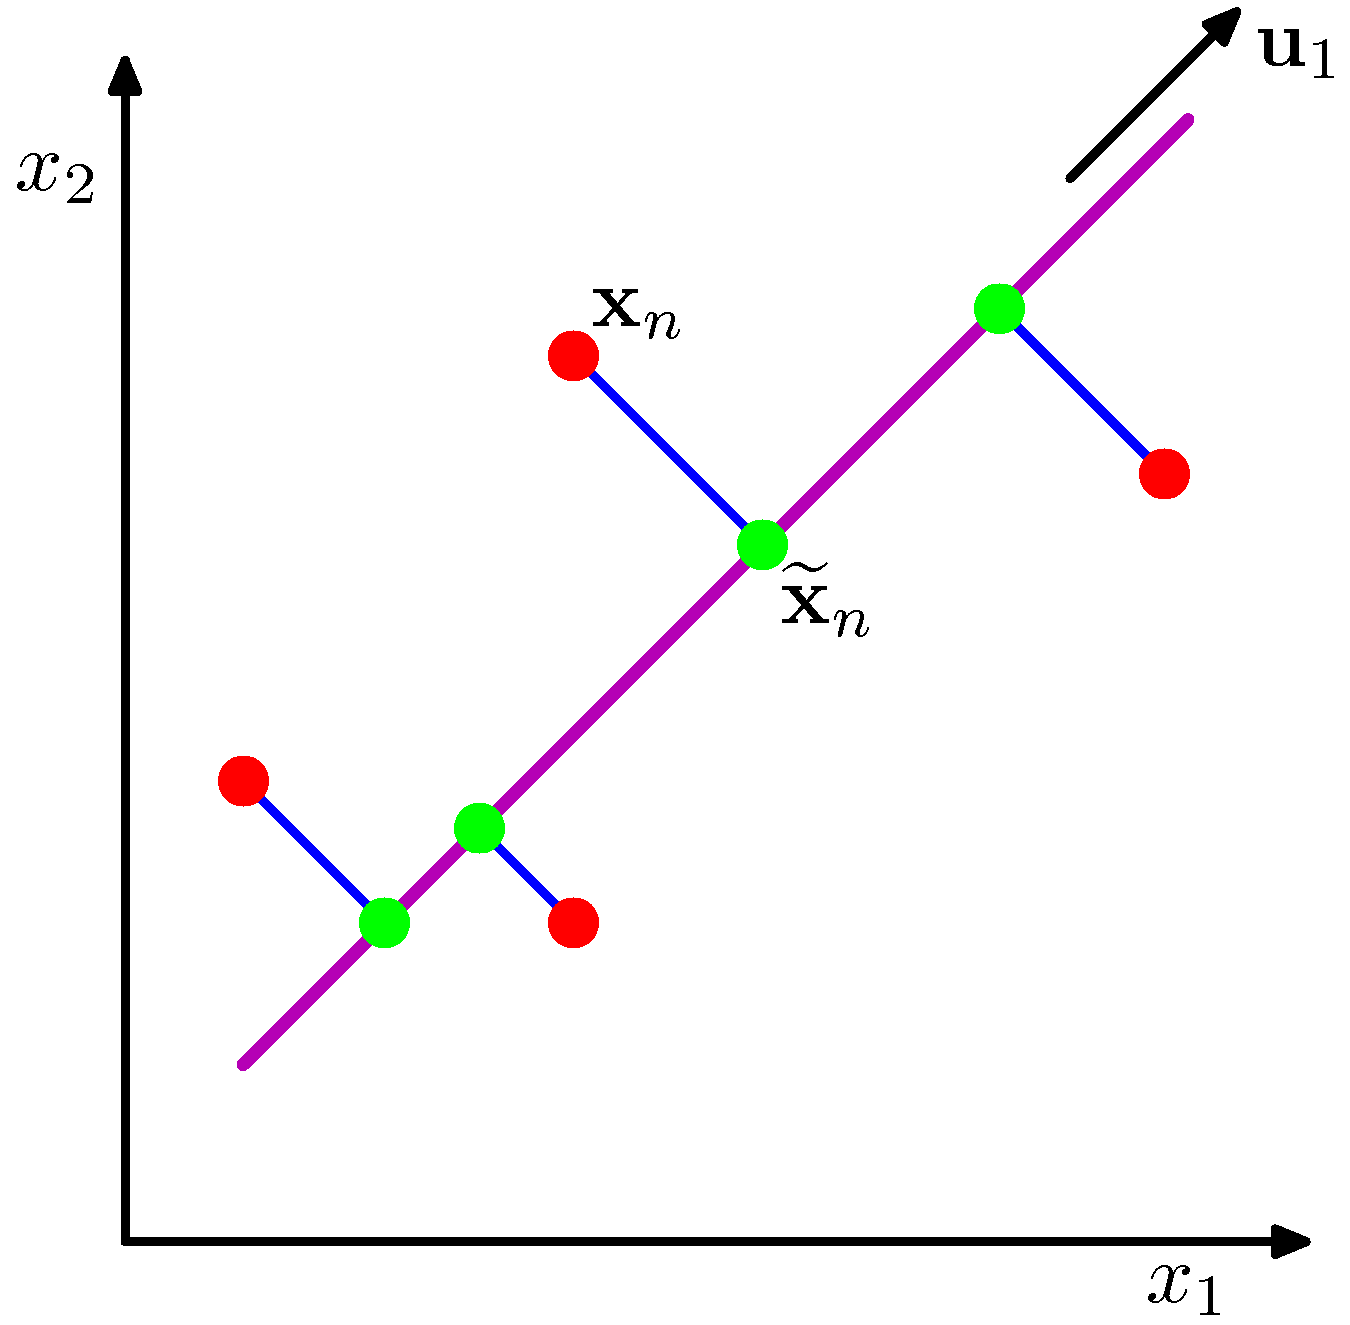

In [1]:
from IPython.display import Image
Image('figures/Figure12.2.png',width=300)

Consider $X$ and a D-dimensional orthogonal basis $\mathbf{u}$:

\begin{align*}\hat{x} = \sum_{i=1}^m y_i a_i\end{align*}

where $m<D$.

\begin{align*}y_j = x^Ta_j \end{align*}

where $A^TA = I$.

We want to minimize the residual error:

\begin{align*}\epsilon = x - \hat{x} = \sum_{i=m+1}^D y_i a_i\end{align*}

* The objective function we will use is the mean square residual:

\begin{align*}
J &= E\left[ \|\epsilon\|^2_2\right]\\
&= E\left[\left( \sum_{i=m+1}^D y_ia_i\right)\left( \sum_{i=m+1}^D y_i a_i\right) \right]\\
&=\sum_{j=m+1}^D E [y_j^2], \text{because }a_i^Ta_j=0, \forall i\neq j \text{ and }a_i^Ta_j=1, \forall i=j\\
&=\sum_{j=m+1}^D E [(a_j^T\mathbf{x})(\mathbf{x}^Ta_j)]\\
&= \sum_{j=m+1}^D a_j^T E[\mathbf{x}\mathbf{x}^T]a_j\\
&= \sum_{j=m+1}^D a_j^T R_x a_j
\end{align*}

Minimize the error and incorporate Lagrange parameters for $A^TA=I$:

\begin{align*}
\frac{\partial J}{\partial a_j} &= 2(R_x a_j - \lambda_j a_j) = 0\\
R_x a_j &= \lambda_j a_j
\end{align*}

So, the sum of the error is the sum of the eigenvalues of the unused eigenvectors.  So, we want to select the eigenvectors with the $m$ largest eigenvalues. 

## Steps of PCA

Consider the data $X$ with $N$ data points defined in a $D$-dimensional space, that is, $X$ is a $D\times N$ matrix.

1. Subtract the mean, $\mu = \frac{1}{N}\sum_{i=1}^N x_i$.

2. Compute the covariance matrix $R_X$ (by definition, the covariance already subtracts the data's mean). This matrix is of size $D\times D$.

3. Compute eigenvectors and eigenvalues of the matrix $R_X$, and store the sorted eigenvectors ($e_i$) in decreasing eigenvalue ($\lambda_i$) order.

4. Build the modal matrix $\mathbf{U} = \left[\begin{array}{c} \mathbf{e_{1}} &| & \mathbf{e_{2}} &|\dots |& \mathbf{e_{D}}\end{array}\right]$, where all the (unit-length) eigenvectors are stacked in columns, sorted by their respective eigenvalues, i.e., $\lambda_1>\lambda_2>\dots>\lambda_D$.

    * For **uncorrelating the data**, preserve all $D$ eigenvectors. Hence $\mathbf{U}$ is a $D \times D$ matrix.
    * For **dimensionality reduction**, keep the top $M$ eigenvectors with the largest eigenvalues. Hence $\mathbf{U}$ is a $D \times M$ matrix.

5. Apply the linear transformation: $\mathbf{y} = \mathbf{U}^T \mathbf{X}$. Here $\mathbf{y}$ is a matrix of size $M \times N$, where $M\leq D$.

Note that the formal definition of covariance already accounts for demeaning the data.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
# Helper functions

def plotvec(*argv):
    colors=['k','b','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
#     plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
#     plt.xlim(min(-1, xmin-1), max(1,xmax+1))
#     plt.ylim(min(-1,ymin-1),max(1,ymax+1))

def plot_contours(K,X=None, R=None):
    '''This function plots the contours of a Bivariate Gaussian RV with
    mean [0,0] and covariance K'''
    
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    xm, ym = np.meshgrid(x, np.flip(y))
    if X is None:
        X = np.dstack([xm,ym])
    if R is not None:
        X = X@R
    
    G = stats.multivariate_normal.pdf(X,mean=[0,0],cov=K)
    
    plt.figure(figsize=(6,6))
    plt.contour(xm,ym,G, extent=[-3,3,-3,3],cmap='viridis');
    
def makerot(theta):
    '''This function creates a 2x2 rotation 
    matrix for a given angle (theta) in degrees'''
    
    theta=np.radians(theta)
    
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    
    return R

In [17]:
import scipy.stats as stats

data = stats.multivariate_normal([0,0],[[1,0.8],[0.8,2]]).rvs(size=100)

data.shape

(100, 2)

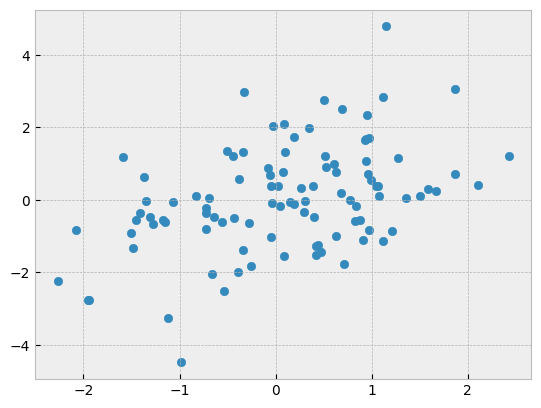

In [4]:
plt.scatter(data[:,0],data[:,1]);

In [5]:
K = np.cov(data.T)

K

array([[1.00145911, 0.63589882],
       [0.63589882, 2.13566785]])

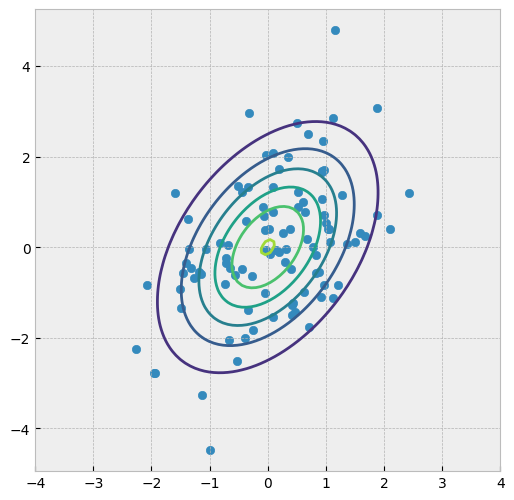

In [9]:
plot_contours(K)
plt.scatter(data[:,0],data[:,1]);

In [10]:
L, V = np.linalg.eigh(K)

L, V

(array([0.716522  , 2.42060495]),
 array([[-0.91257412,  0.40891133],
        [ 0.40891133,  0.91257412]]))

In [11]:
L=L[::-1]

V=V[:,::-1]

L, V

(array([2.42060495, 0.716522  ]),
 array([[ 0.40891133, -0.91257412],
        [ 0.91257412,  0.40891133]]))

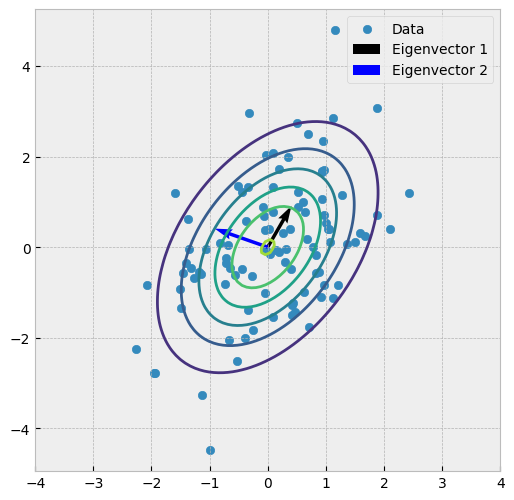

In [12]:
plot_contours(K)
plt.scatter(data[:,0],data[:,1])
plotvec(V[:,0], V[:,1])
plt.legend(['Data','Eigenvector 1', 'Eigenvector 2']);

In [13]:
rotated = V.T@data.T

rotated.shape

(2, 100)

In [14]:
K2 = np.cov(rotated)

np.round(K2,7)

array([[2.420605, 0.      ],
       [0.      , 0.716522]])

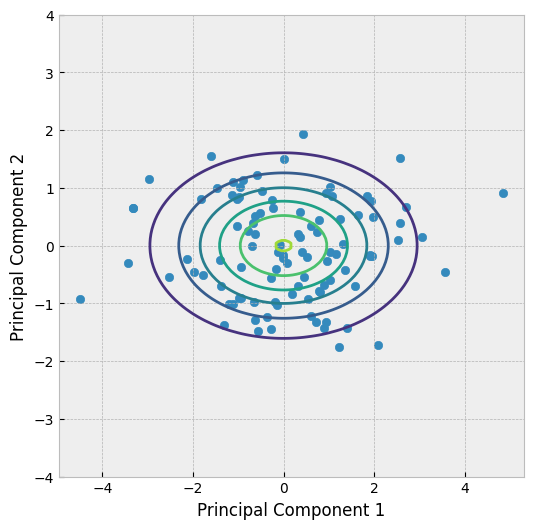

In [15]:
plot_contours(K2)
plt.scatter(rotated[0,:],rotated[1,:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [18]:
# standard unit vector
e1=np.array([[1],[0]])

angle = np.degrees(np.arccos((e1.T@V[:,0])/(np.linalg.norm(e1)*np.linalg.norm(V[:,0]))))[0]

angle

65.86353570631451

In [19]:
rotated2 = makerot(-angle)@data.T

In [20]:
K3 = np.cov(rotated2)

np.round(K3,7)

array([[ 2.1850044, -0.1770322],
       [-0.1770322,  0.5037493]])

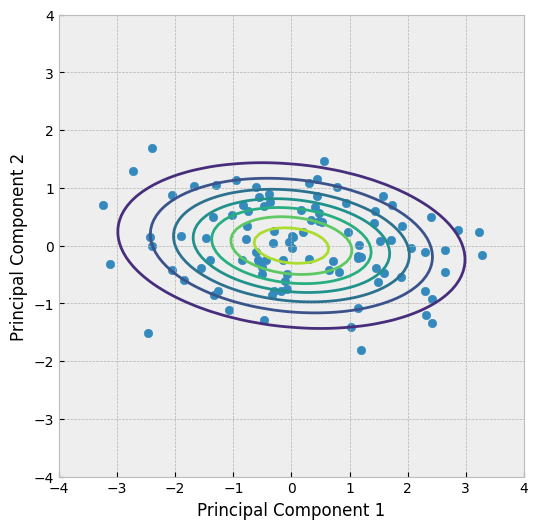

In [21]:
plot_contours(K3)
plt.scatter(rotated2[0,:],rotated2[1,:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

---

In [22]:
import pandas as pd
from scipy import stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['axes.grid'] = False

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [23]:
def myPCA(X, m, display=1):
    '''This function implements PCA. The data matrix X is DxN matrix, 
    where D is the dimension and N the number of points'''
    
    D, N = X.shape
    
    # Demean the Data
    data = X
    
    # Covariance of the input data X
    cov_mat = np.cov(data)
    
    # Find eigenvectors and eigenvalues 
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
    
    # Sort eigenvectors by magnitude of eigenvalues
    L = eigen_vals[::-1]
    U = eigen_vecs[:,::-1]
    
    # Linear transformation
    A = U[:,:m].T
    
    #compute explained variance and plot
    cuml_var_exp=0
    total = sum(L)
    var_explained = [(i/total) for i in L]
    cuml_var_exp = np.cumsum(var_explained)
    if display:
        plt.bar(range(1,D+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(1,D+1), cuml_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best');
    return A, var_explained

---

Coming back to the wine dataset:

In [24]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
t = df_wine['Class label'].values
X = df_wine.drop(['Class label'], axis=1).values

X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.3, 
                                                    stratify=t)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

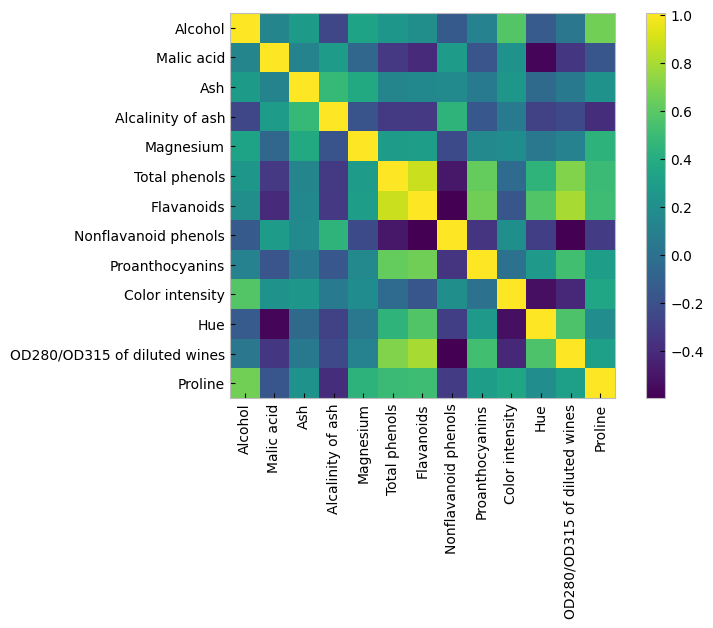

In [26]:
cov_train = np.cov(X_train.T) #how two things move togather (in this case x train with t)

plt.figure(figsize=(8,5))
plt.imshow(cov_train)
plt.colorbar()
plt.xticks(range(13),df_wine.columns[1:],rotation=90)
plt.yticks(range(13),df_wine.columns[1:]);

In [27]:
X_train.shape

(124, 13)

(13, 13)

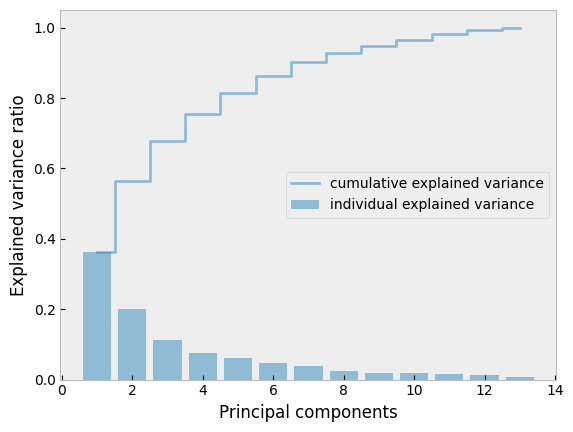

In [28]:
A,var_explained = myPCA(X_train.T, 13, display=1)

A.shape

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data.

Although the explained variance plot reminds us of the feature importance, we shall remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored.

In [29]:
X_train_pca = (A@X_train.T).T

print(X_train.shape, X_train_pca.shape)

(124, 13) (124, 13)


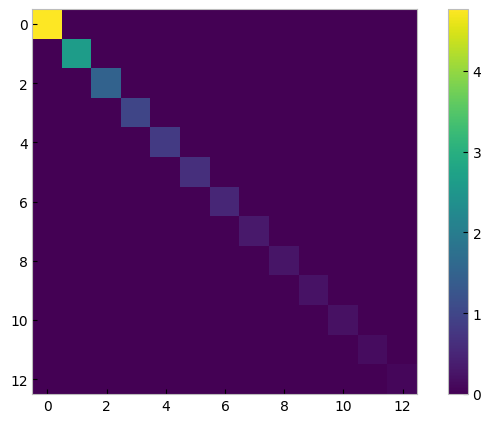

In [30]:
cov_mat = np.cov(X_train_pca.T)

plt.figure(figsize=(8,5))
plt.imshow(cov_mat)
plt.colorbar();

## PCA with ```scikit-learn```

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=13)
pca

PCA(n_components=13)

In [33]:
pca.fit(X_train)

PCA(n_components=13)

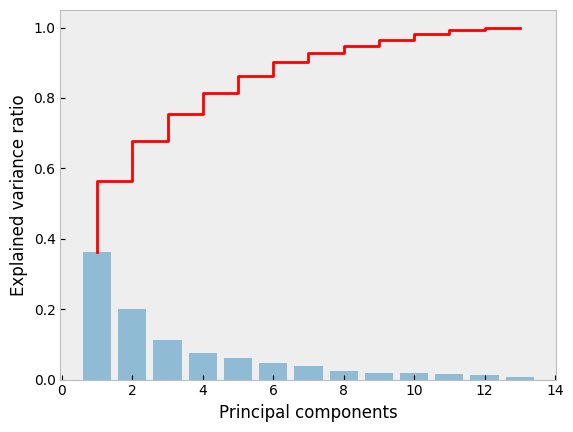

In [34]:
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_),c='r')
plt.bar(range(1,14),pca.explained_variance_ratio_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components');

In [35]:
y_train_pca = pca.transform(X_train)

y_train_pca.shape

(124, 13)

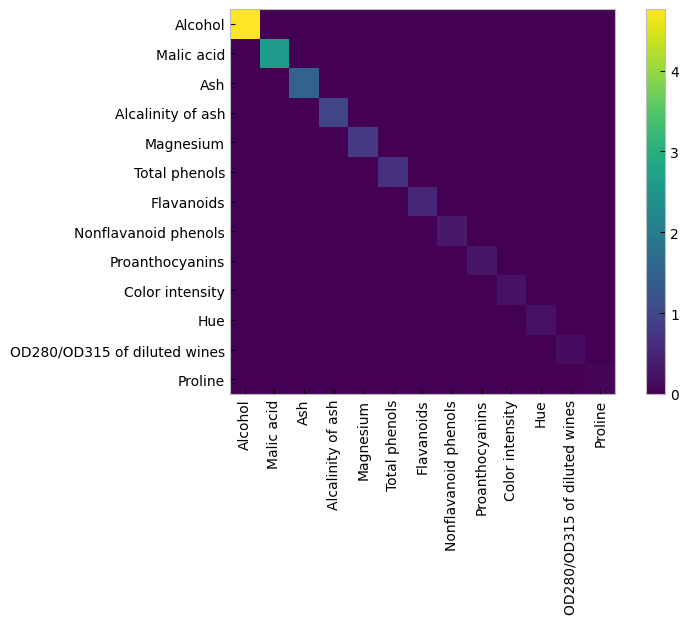

In [36]:
cov_mat = np.cov(y_train_pca.T)

plt.figure(figsize=(8,5))
plt.imshow(cov_mat)
plt.colorbar()
plt.xticks(range(13),df_wine.columns[1:],rotation=90)
plt.yticks(range(13),df_wine.columns[1:]);

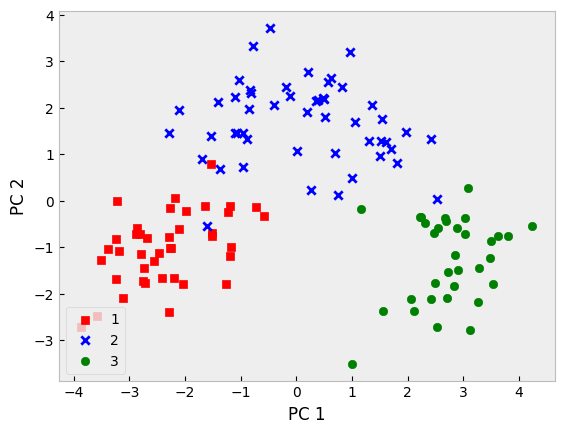

In [37]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(t_train), colors, markers):
    plt.scatter(y_train_pca[t_train==l, 0], y_train_pca[t_train==l, 1],c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

The training data is used to find the new features (eigenvectors). We can then represent the test set in this new feature space:

In [38]:
y_test_pca = pca.transform(X_test)

y_test_pca.shape

(54, 13)